In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('cover_type (1).csv')
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Wilderness_Area,Soil_Type
0,2596,51,3,258,0,510,221,232,148,6279,Aspen,1,29
1,2590,56,2,212,-6,390,220,235,151,6225,Aspen,1,29
2,2804,139,9,268,65,3180,234,238,135,6121,Lodgepole Pine,1,12
3,2785,155,18,242,118,3090,238,238,122,6211,Lodgepole Pine,1,30
4,2595,45,2,153,-1,391,220,234,150,6172,Aspen,1,29


In [6]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145890 entries, 0 to 145889
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Elevation                           145890 non-null  int64 
 1   Aspect                              145890 non-null  int64 
 2   Slope                               145890 non-null  int64 
 3   Horizontal_Distance_To_Hydrology    145890 non-null  int64 
 4   Vertical_Distance_To_Hydrology      145890 non-null  int64 
 5   Horizontal_Distance_To_Roadways     145890 non-null  int64 
 6   Hillshade_9am                       145890 non-null  int64 
 7   Hillshade_Noon                      145890 non-null  int64 
 8   Hillshade_3pm                       145890 non-null  int64 
 9   Horizontal_Distance_To_Fire_Points  145890 non-null  int64 
 10  Cover_Type                          145890 non-null  object
 11  Wilderness_Area                     145

In [7]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type
count,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000
mean,2874.458949,141.127418,11.925574,251.824738,34.554322,3313.827541,217.368106,224.874748,139.788203,3044.958105,1.186593,23.364905
std,210.801279,107.719296,6.319326,192.473899,41.215776,1687.779953,21.590298,16.084851,31.311690,1761.882341,0.656571,8.215184
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,1.000000,1.000000
25%,2747.000000,54.000000,7.000000,95.000000,7.000000,1848.000000,207.000000,216.000000,121.000000,1608.000000,1.000000,12.000000
50%,2909.000000,108.000000,11.000000,212.000000,23.000000,3420.000000,222.000000,226.000000,140.000000,2713.000000,1.000000,29.000000
75%,3004.000000,217.000000,15.000000,362.000000,51.000000,4673.000000,232.000000,236.000000,159.000000,4478.000000,1.000000,29.000000
max,3849.000000,360.000000,61.000000,1343.000000,554.000000,7117.000000,254.000000,254.000000,248.000000,7173.000000,4.000000,40.000000


In [8]:
df.isnull().sum()

,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0


In [11]:
numerical_columns = df.columns.drop("Cover_Type")

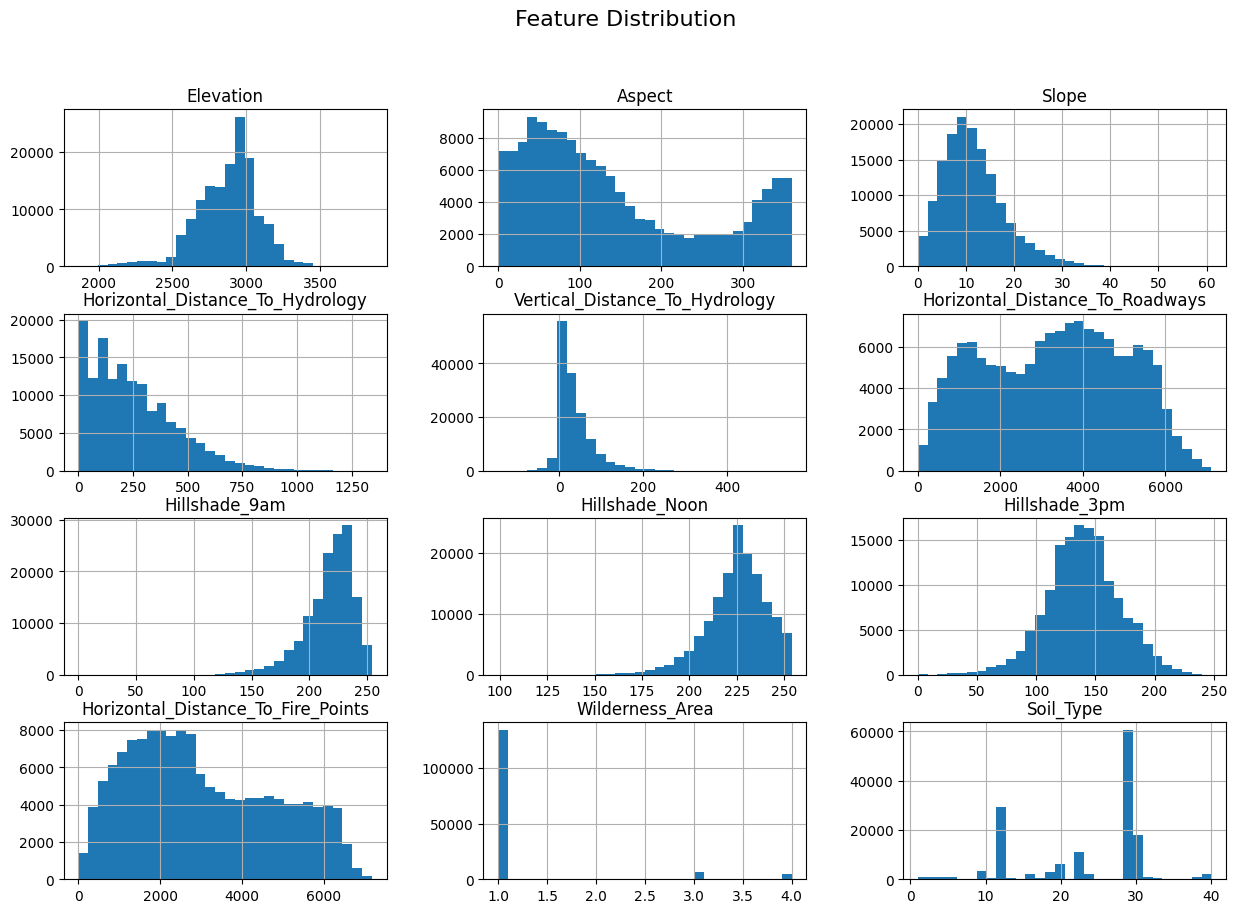

In [12]:
df[numerical_columns].hist(figsize=(15,10), bins= 30)
plt.suptitle("Feature Distribution", fontsize= 16)
plt.show()

In [13]:
skewed_data = df[numerical_columns].skew().sort_values(ascending = False)
skewed_data

,0
Wilderness_Area,3.423545
Vertical_Distance_To_Hydrology,1.792939
Horizontal_Distance_To_Hydrology,0.984953
Slope,0.943937
Aspect,0.689432
Horizontal_Distance_To_Fire_Points,0.365249
Horizontal_Distance_To_Roadways,-0.058240
Hillshade_3pm,-0.165213
Elevation,-0.664497
Soil_Type,-0.692105


<function matplotlib.pyplot.show(close=None, block=None)>

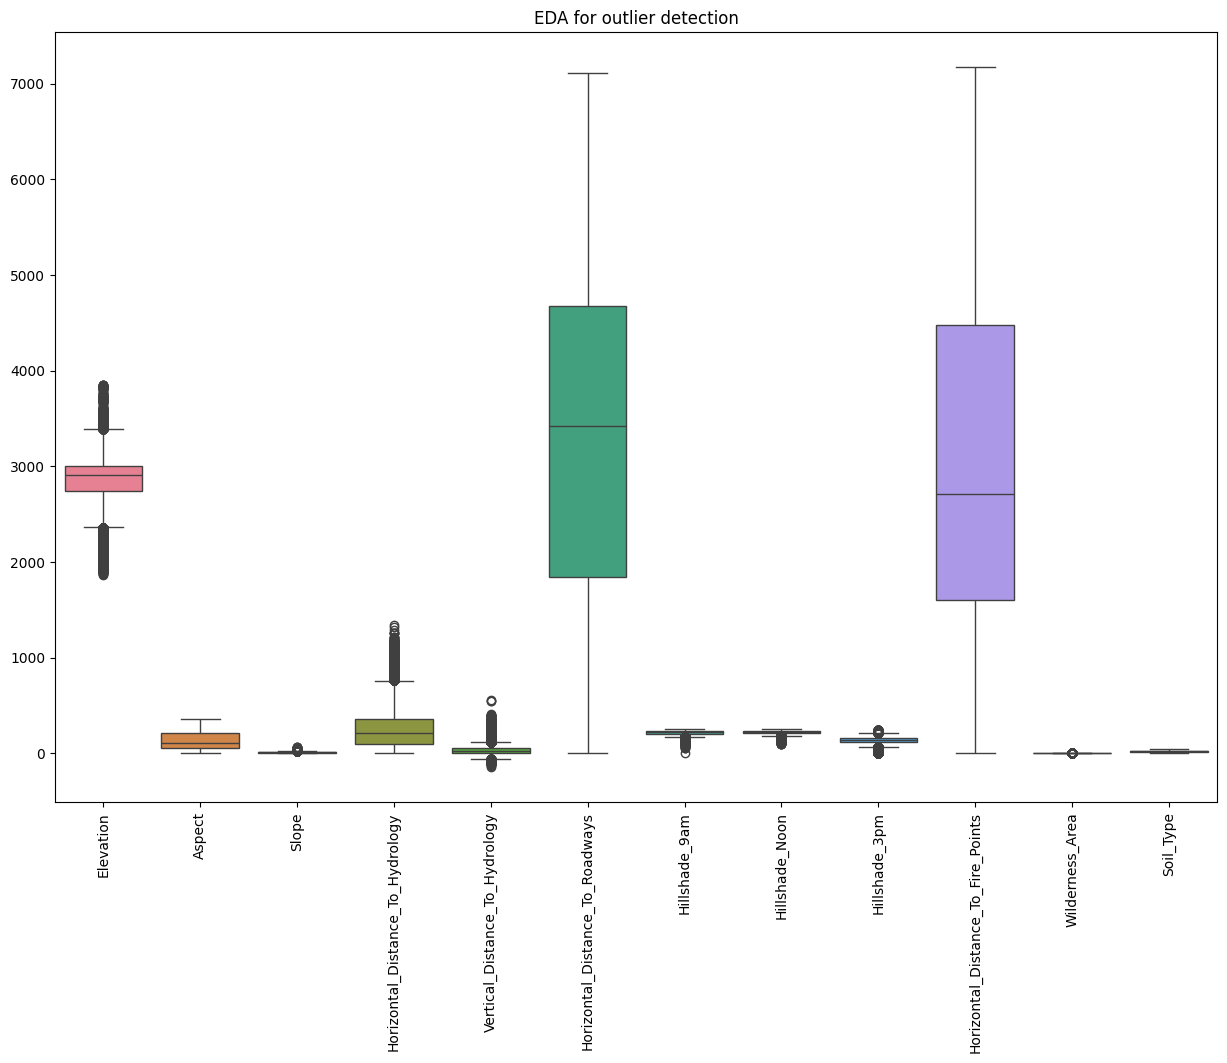

In [14]:
plt.figure(figsize = (15,10))
sns.boxplot(data= df[numerical_columns])
plt.xticks(rotation=90)
plt.title("EDA for outlier detection")
plt.show

In [15]:
skewed_cols = [
     'Horizontal_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Horizontal_Distance_To_Fire_Points'
]
df[skewed_cols] = np.log1p(df[skewed_cols])

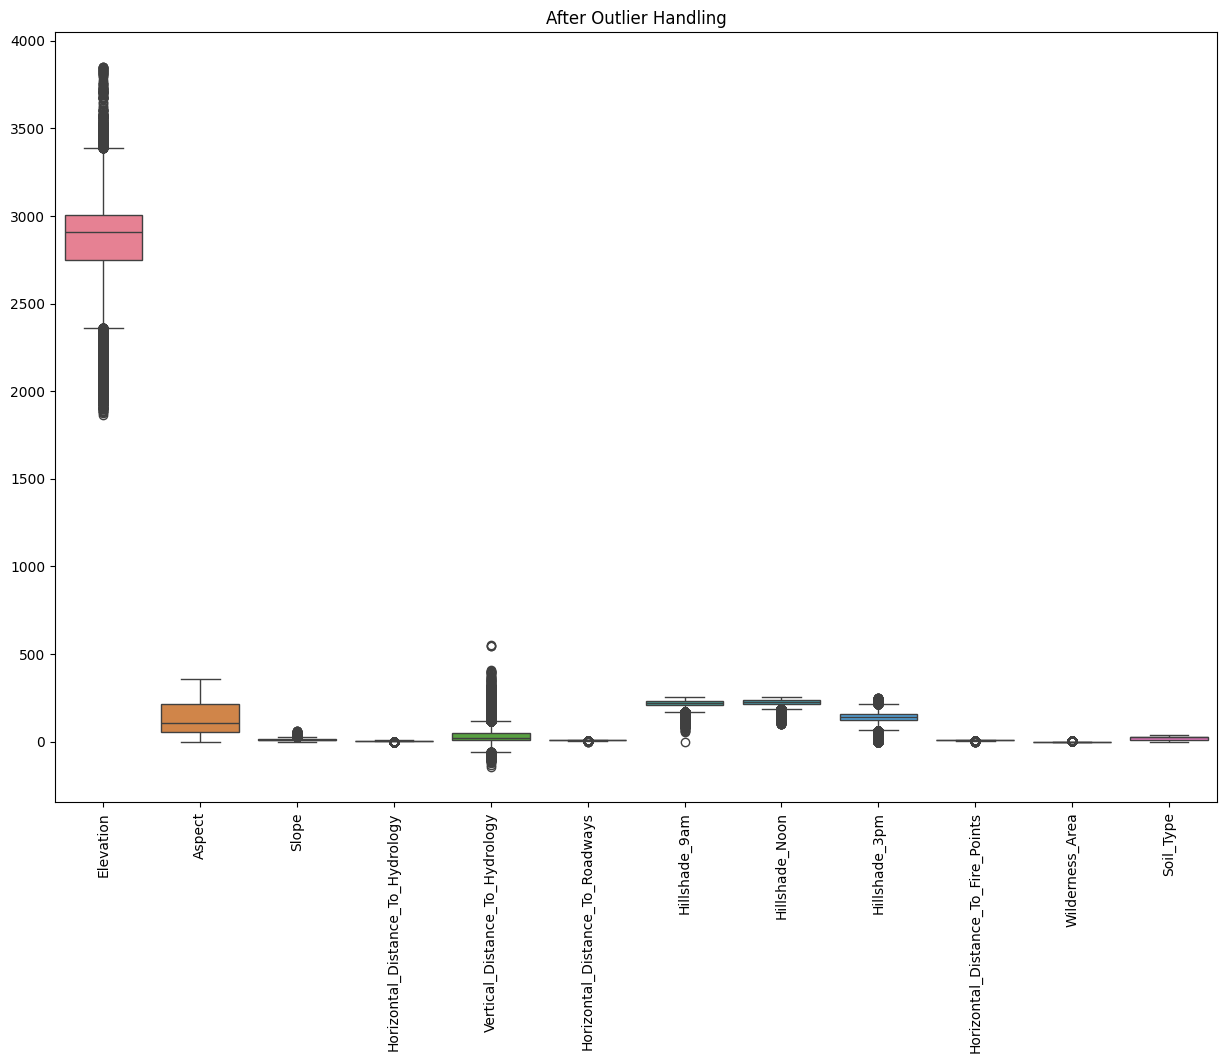

In [16]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df[numerical_columns])
plt.xticks(rotation=90)
plt.title("After Outlier Handling")
plt.show()

In [17]:
correlation = df[numerical_columns].corr()

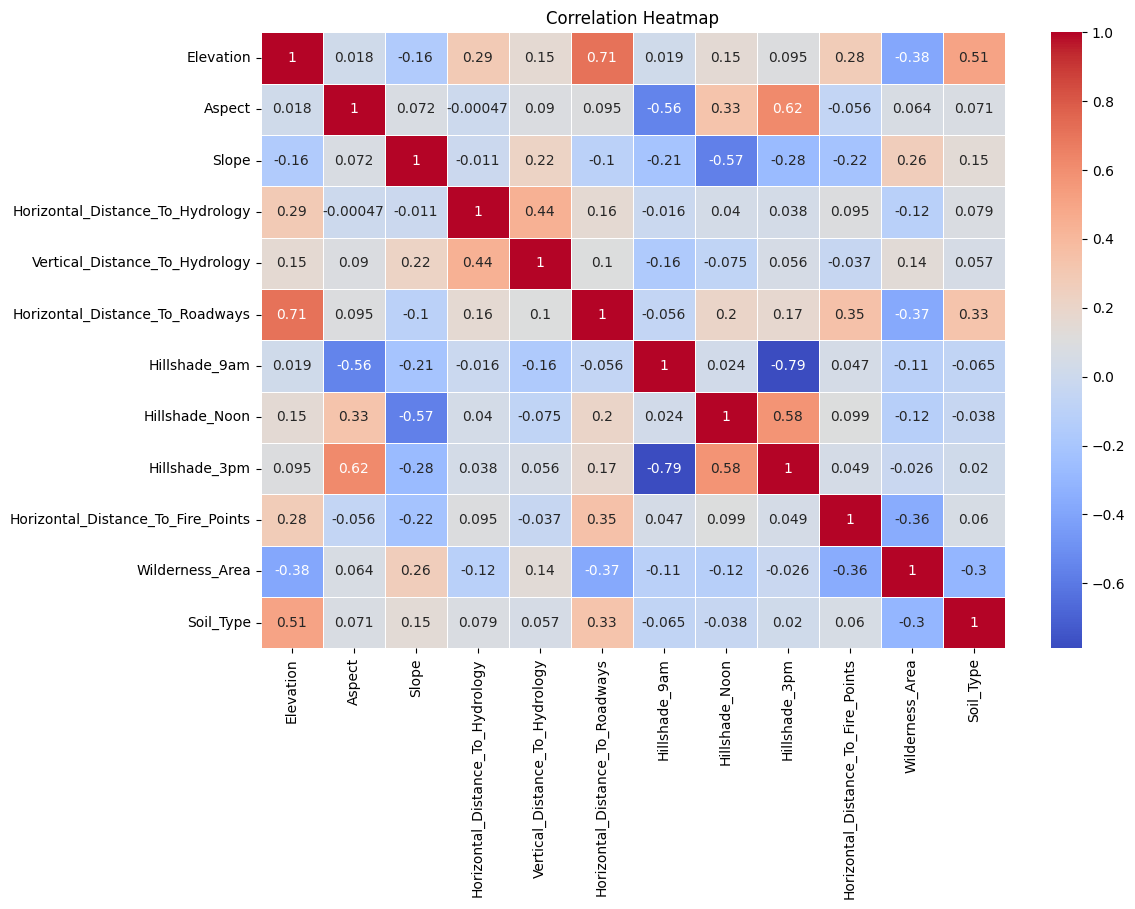

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation, cmap="coolwarm", linewidths=0.5, annot= True)
plt.title("Correlation Heatmap")
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop("Cover_Type", axis=1)
X = X.replace([np.inf, -np.inf], np.nan)
y = df["Cover_Type"]

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X, y)

importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

importance_df.head(10)

,Feature,Importance
0,Elevation,0.268172
5,Horizontal_Distance_To_Roadways,0.148341
9,Horizontal_Distance_To_Fire_Points,0.136685
11,Soil_Type,0.085045
10,Wilderness_Area,0.070513
3,Horizontal_Distance_To_Hydrology,0.062932
4,Vertical_Distance_To_Hydrology,0.055896
1,Aspect,0.040641
6,Hillshade_9am,0.035301
7,Hillshade_Noon,0.035197


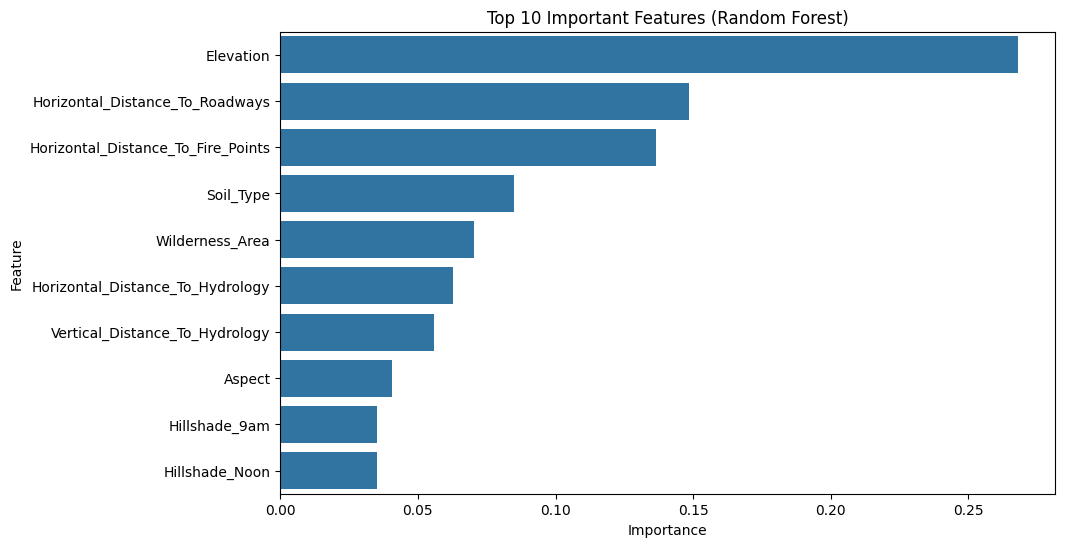

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(
    x="Importance",
    y="Feature",
    data=importance_df.head(10)
)
plt.title("Top 10 Important Features (Random Forest)")
plt.show()